# Single Well Assay with 0.5 uM dialyzed p38, Abl GK, and WT Src

## Infinite Script with single wv reads and separate script with spectra reads

### Plot single wv data

In [2]:
# %load single wavelength data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader


filenames_single_wv = ['p38_Abl_GK_WT_Src_single_wv_conc_0_20190222_10484.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_1_20190222_11001.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_2_20190222_1110.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_3_20190222_1119.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_4_20190222_1129.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_5_20190222_1139.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_6_20190222_1149.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_7_20190222_1159.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_8_20190222_1209.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_9_20190222_1219.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_10_20190222_1229.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_11_20190222_1239.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_12_20190222_1249.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_13_20190222_1259.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_14_20190222_1308.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_15_20190222_1318.xml',
             'p38_Abl_GK_WT_Src_single_wv_conc_16_20190222_1328.xml']

datapath_single_wv = 'infinite_results/single_wv'


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


reads_single_wv = list()
nreads_single_wv = len(filenames_single_wv)
for read in range(nreads_single_wv):
    read = platereader.read_icontrol_xml(os.path.join(datapath_single_wv, filenames_single_wv[read]))
    reads_single_wv.append(read)
    
plate_layout = pd.read_excel('20190222_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [7]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

title = 'Fluorescence Reads Ex 280 nm Em 480 nm'

label = 'ex280_em480_top_gain100'

data_single_wv = np.zeros([nrows, ncols, nreads_single_wv], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_single_wv = [(reads_single_wv[i][label][well]) for i in range(nreads_single_wv)]
        for i in range(nreads_single_wv):
            measurements_single_wv = [x if x != 'OVER' else 0 for x in measurements_single_wv]
            measurements_single_wv = [float(i) for i in measurements_single_wv]
        data_single_wv[row_index,col_index,:] = np.array(measurements_single_wv)

## Plot fluorescence at single wv (480 nm)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

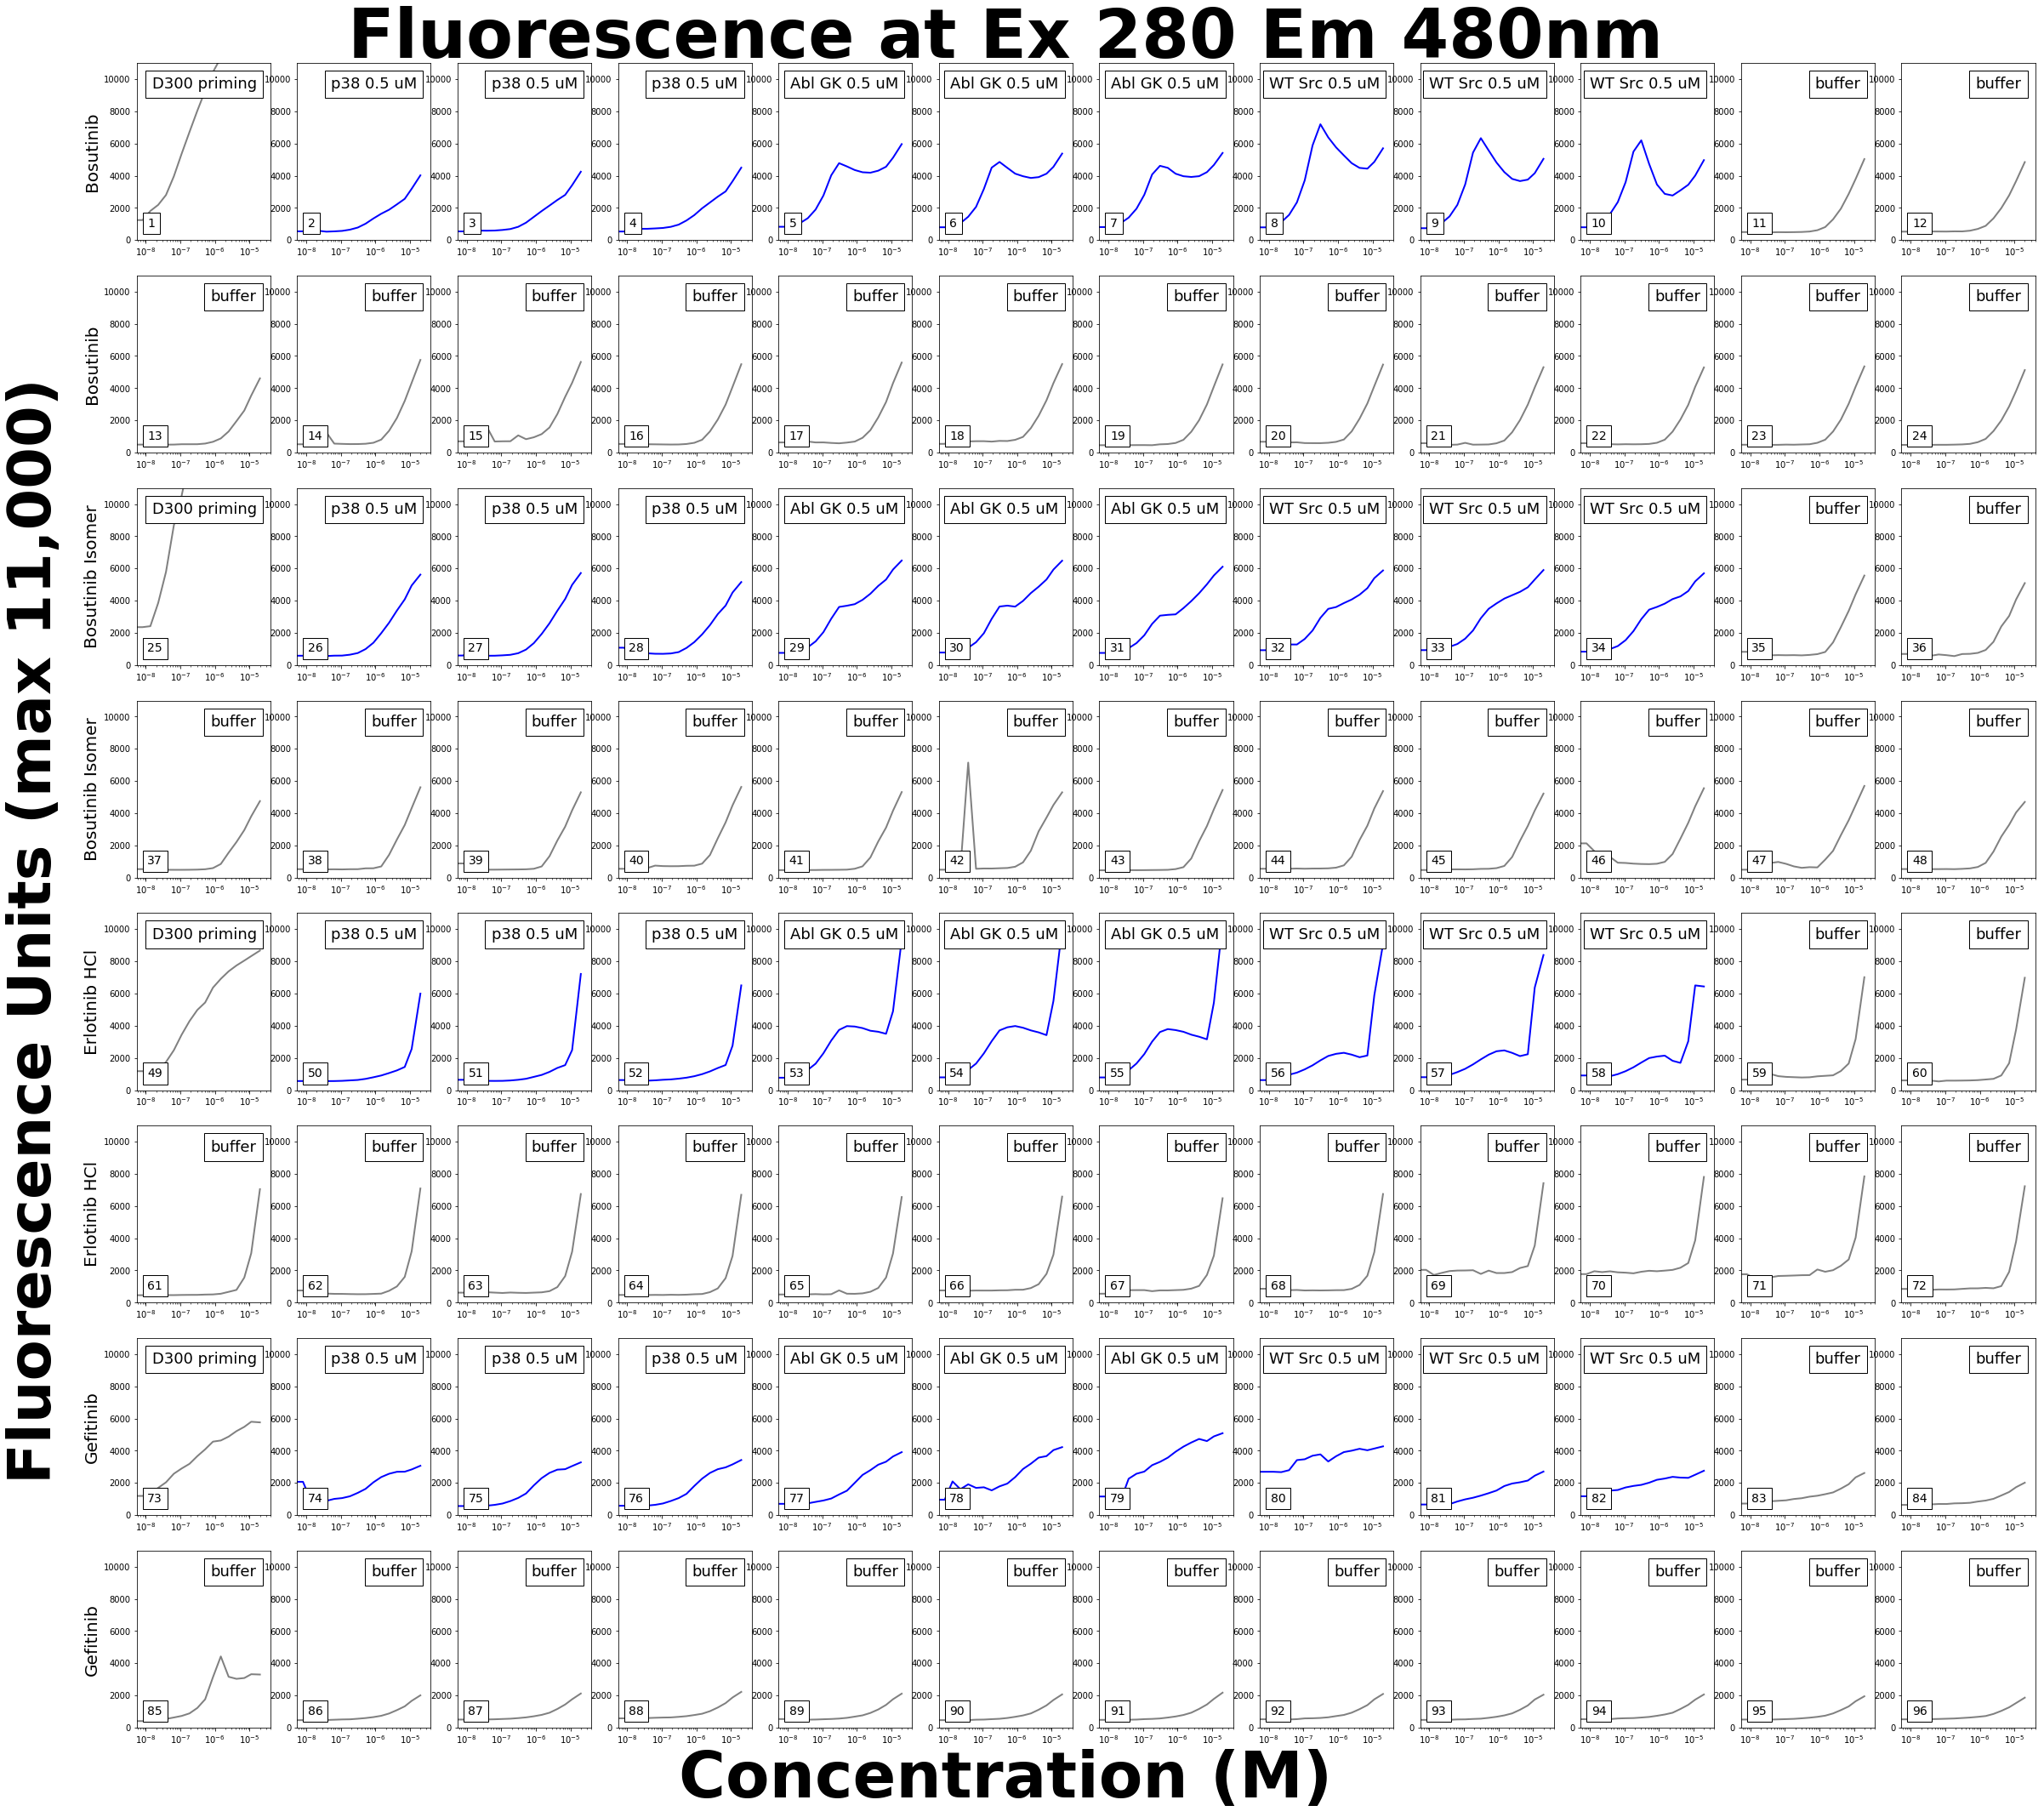

In [10]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Fluorescence at Ex 280 Em 480nm'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color='b'
            plt.semilogx(x_values, data_single_wv[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.ylim(0,11000)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=80, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max 11,000)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190222_single_well_single_wv_dial_prot_log_y.pdf', bbox_inches='tight', dpi=300)

## Plot single wv absorbance at 280 nm across concentrations

In [13]:
# need to associate reads with correct well

nrows = 8
ncols = 12
index = 0

label = 'abs_280'
    
title = 'Absorbance Reads'

data_single_wv_abs = np.zeros([nrows, ncols, nreads_single_wv], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_single_wv_abs = [(reads_single_wv[i][label][well]) for i in range(nreads_single_wv)]
        for i in range(nreads_single_wv):
            measurements_single_wv_abs = [x if x != 'OVER' else 0 for x in measurements_single_wv_abs]
            measurements_single_wv_abs = [float(i) for i in measurements_single_wv_abs]
        data_single_wv_abs[row_index,col_index,:] = np.array(measurements_single_wv_abs)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

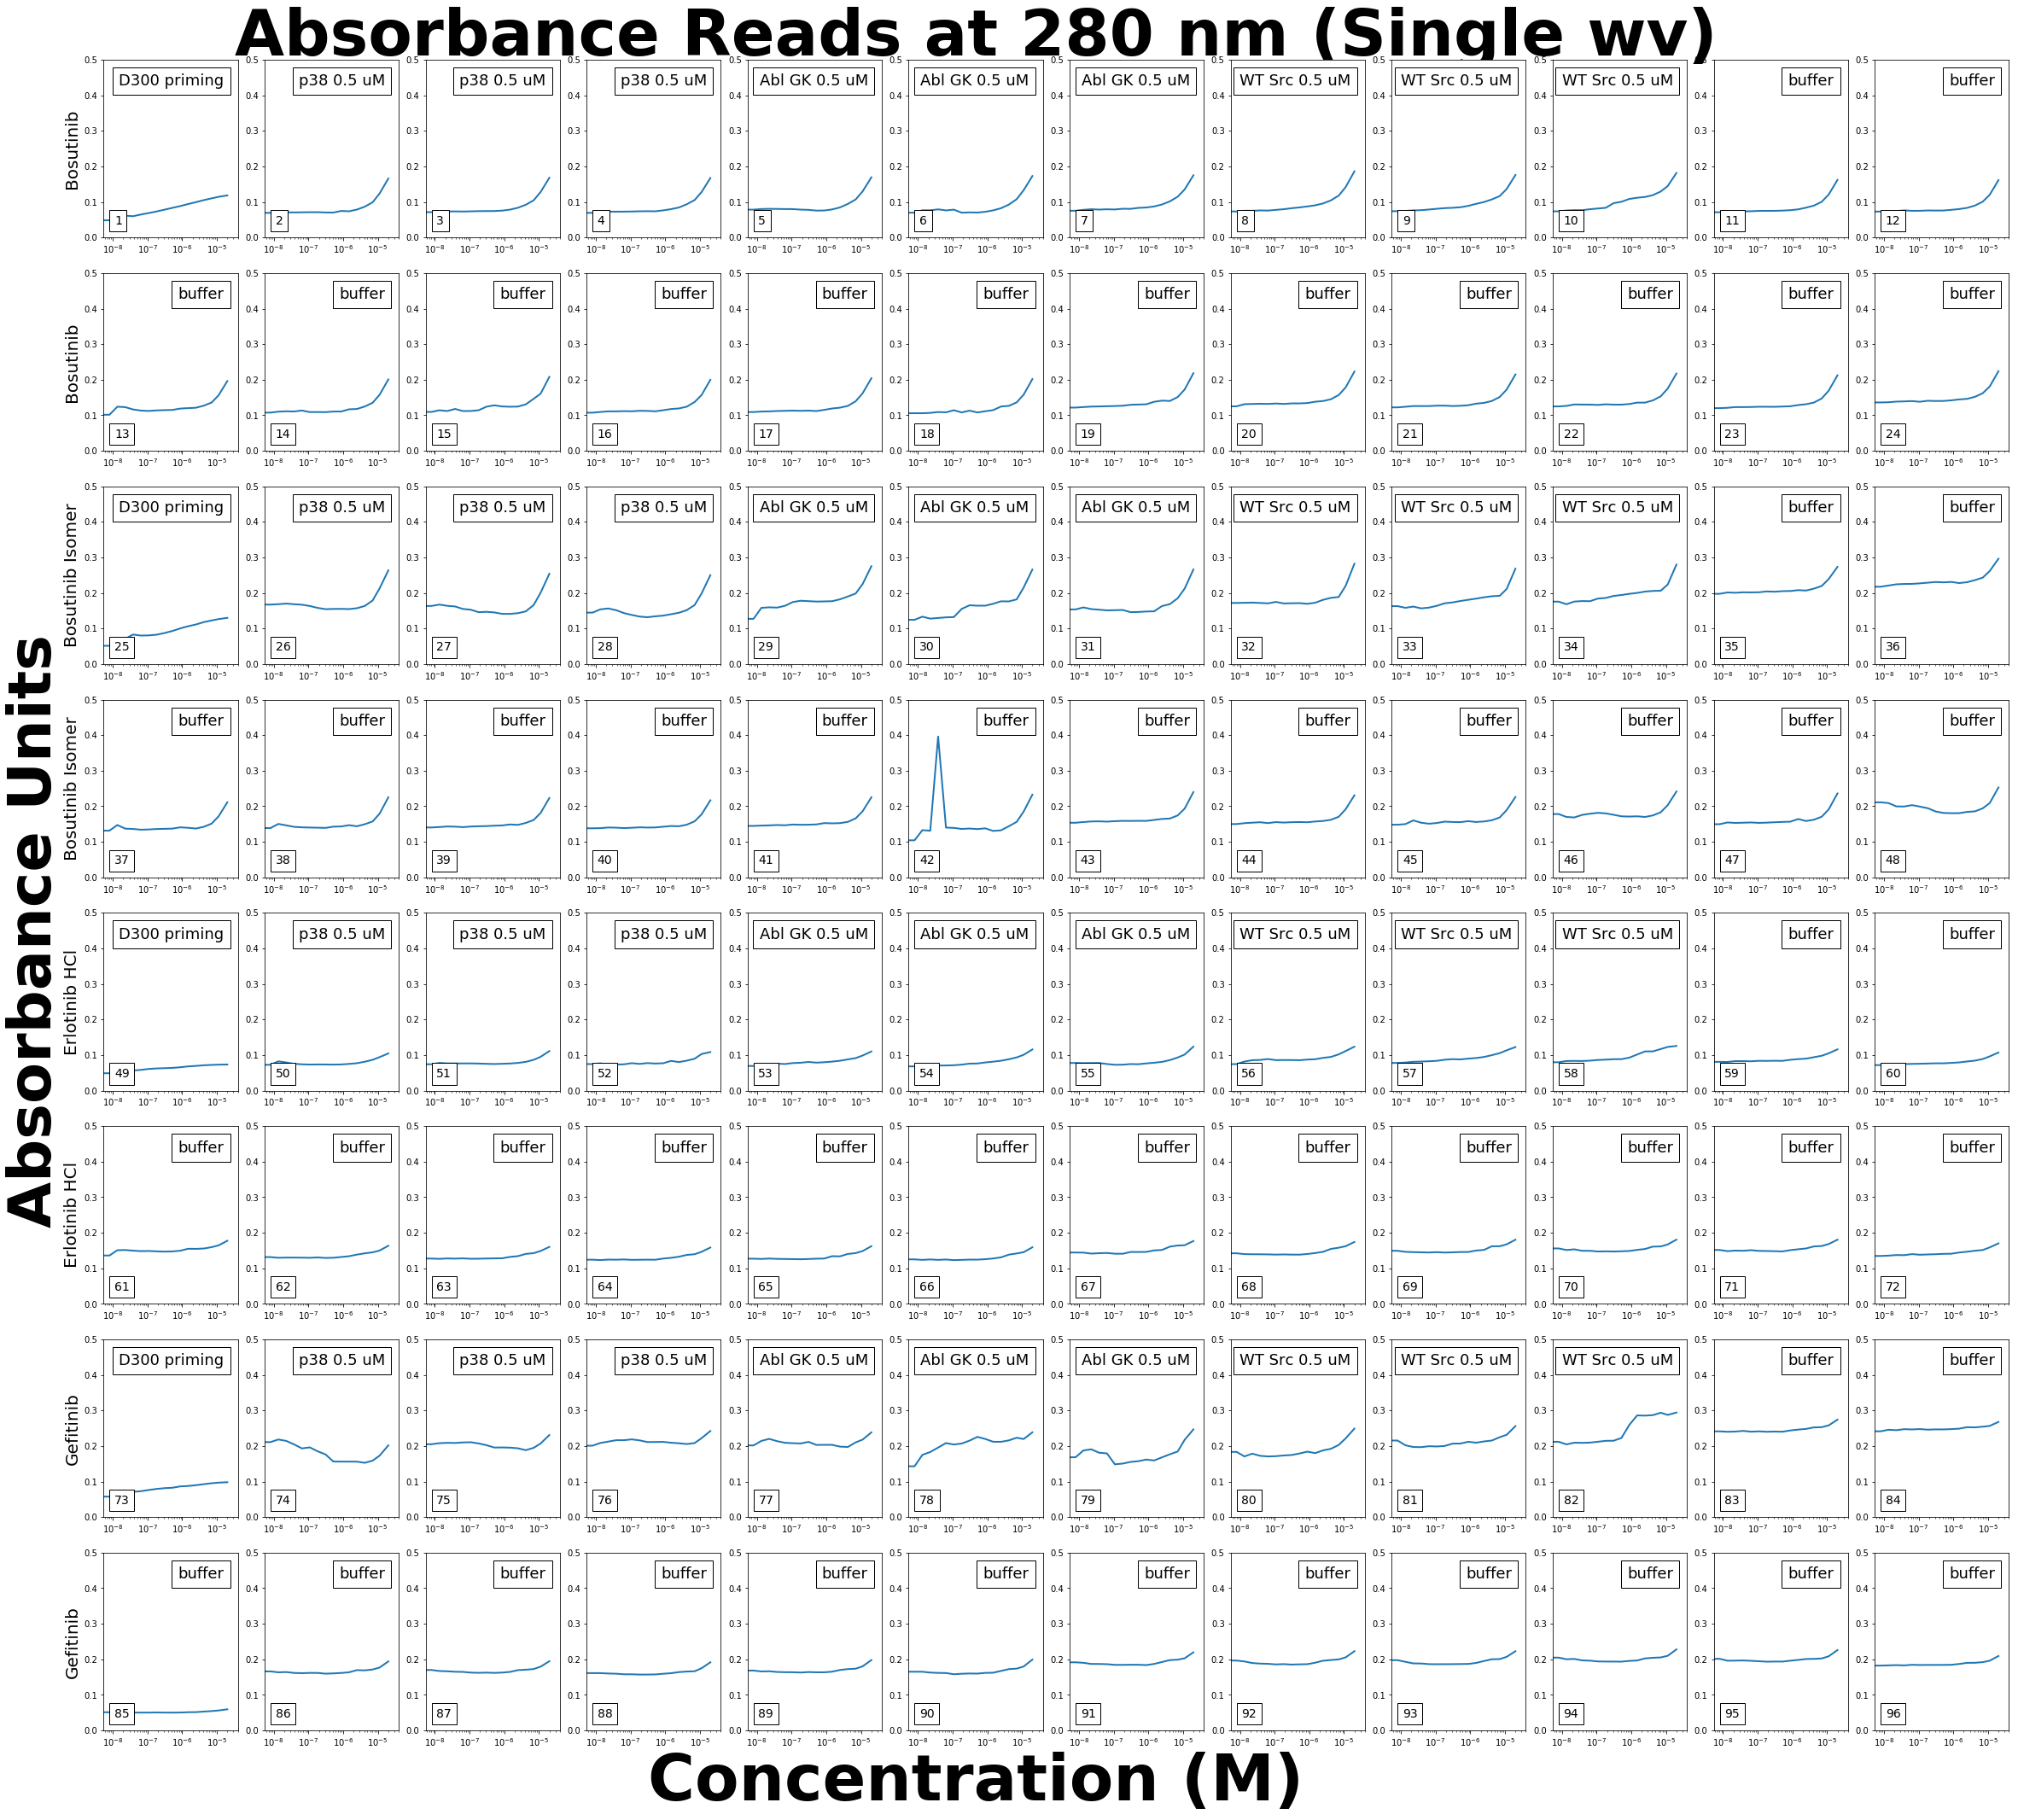

In [15]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Absorbance Reads at 280 nm (Single wv)'

x_values = concentrations
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_single_wv_abs[row_index,col_index,:], linewidth=2)

        plt.xlim(0,4e-5)
        plt.ylim(0, 0.5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
             plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=75, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Absorbance Units', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.5,4.5)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

            
fig.savefig('20190222_single_well_abs_single_wv_280nm.pdf', bbox_inches='tight', dpi=300)

### Plot spectra data

In [16]:
# load spectra data

filenames_spectra = ['p38_Abl_GK_WT_Src_spectra_1_20190222_132945.xml',
             'p38_Abl_GK_WT_Src_spectra_2_20190222_133222.xml',
             'p38_Abl_GK_WT_Src_spectra_3_20190222_133500.xml',
             'p38_Abl_GK_WT_Src_spectra_4_20190222_133737.xml',
             'p38_Abl_GK_WT_Src_spectra_5_20190222_134015.xml',
             'p38_Abl_GK_WT_Src_spectra_6_20190222_134252.xml',
             'p38_Abl_GK_WT_Src_spectra_7_20190222_134530.xml',
             'p38_Abl_GK_WT_Src_spectra_8_20190222_134807.xml',
             'p38_Abl_GK_WT_Src_spectra_9_20190222_135045.xml',
             'p38_Abl_GK_WT_Src_spectra_10_20190222_135322.xml',
             'p38_Abl_GK_WT_Src_spectra_11_20190222_135600.xml',
             'p38_Abl_GK_WT_Src_spectra_12_20190222_135837.xml']

datapath_spectra = 'infinite_results/spectra'

reads_spectra = list()
nreads_spectra = len(filenames_spectra)
for read in range(nreads_spectra):
    read = platereader.read_icontrol_xml(os.path.join(datapath_spectra, filenames_spectra[read]))
    reads_spectra.append(read)

In [17]:
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data_spectra = np.zeros([nrows, ncols, nreads_spectra, 4], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads_spectra[0][label][well].keys())
        measurements_spectra = [list(reads_spectra[i][label][well].values()) for i in range(nreads_spectra)]
        for i in range(nreads_spectra):
            measurements_spectra[i] = [x if x != 'OVER' else 0 for x in measurements_spectra[i]]
        data_spectra[row_index,col_index,:] = np.array(measurements_spectra)
        

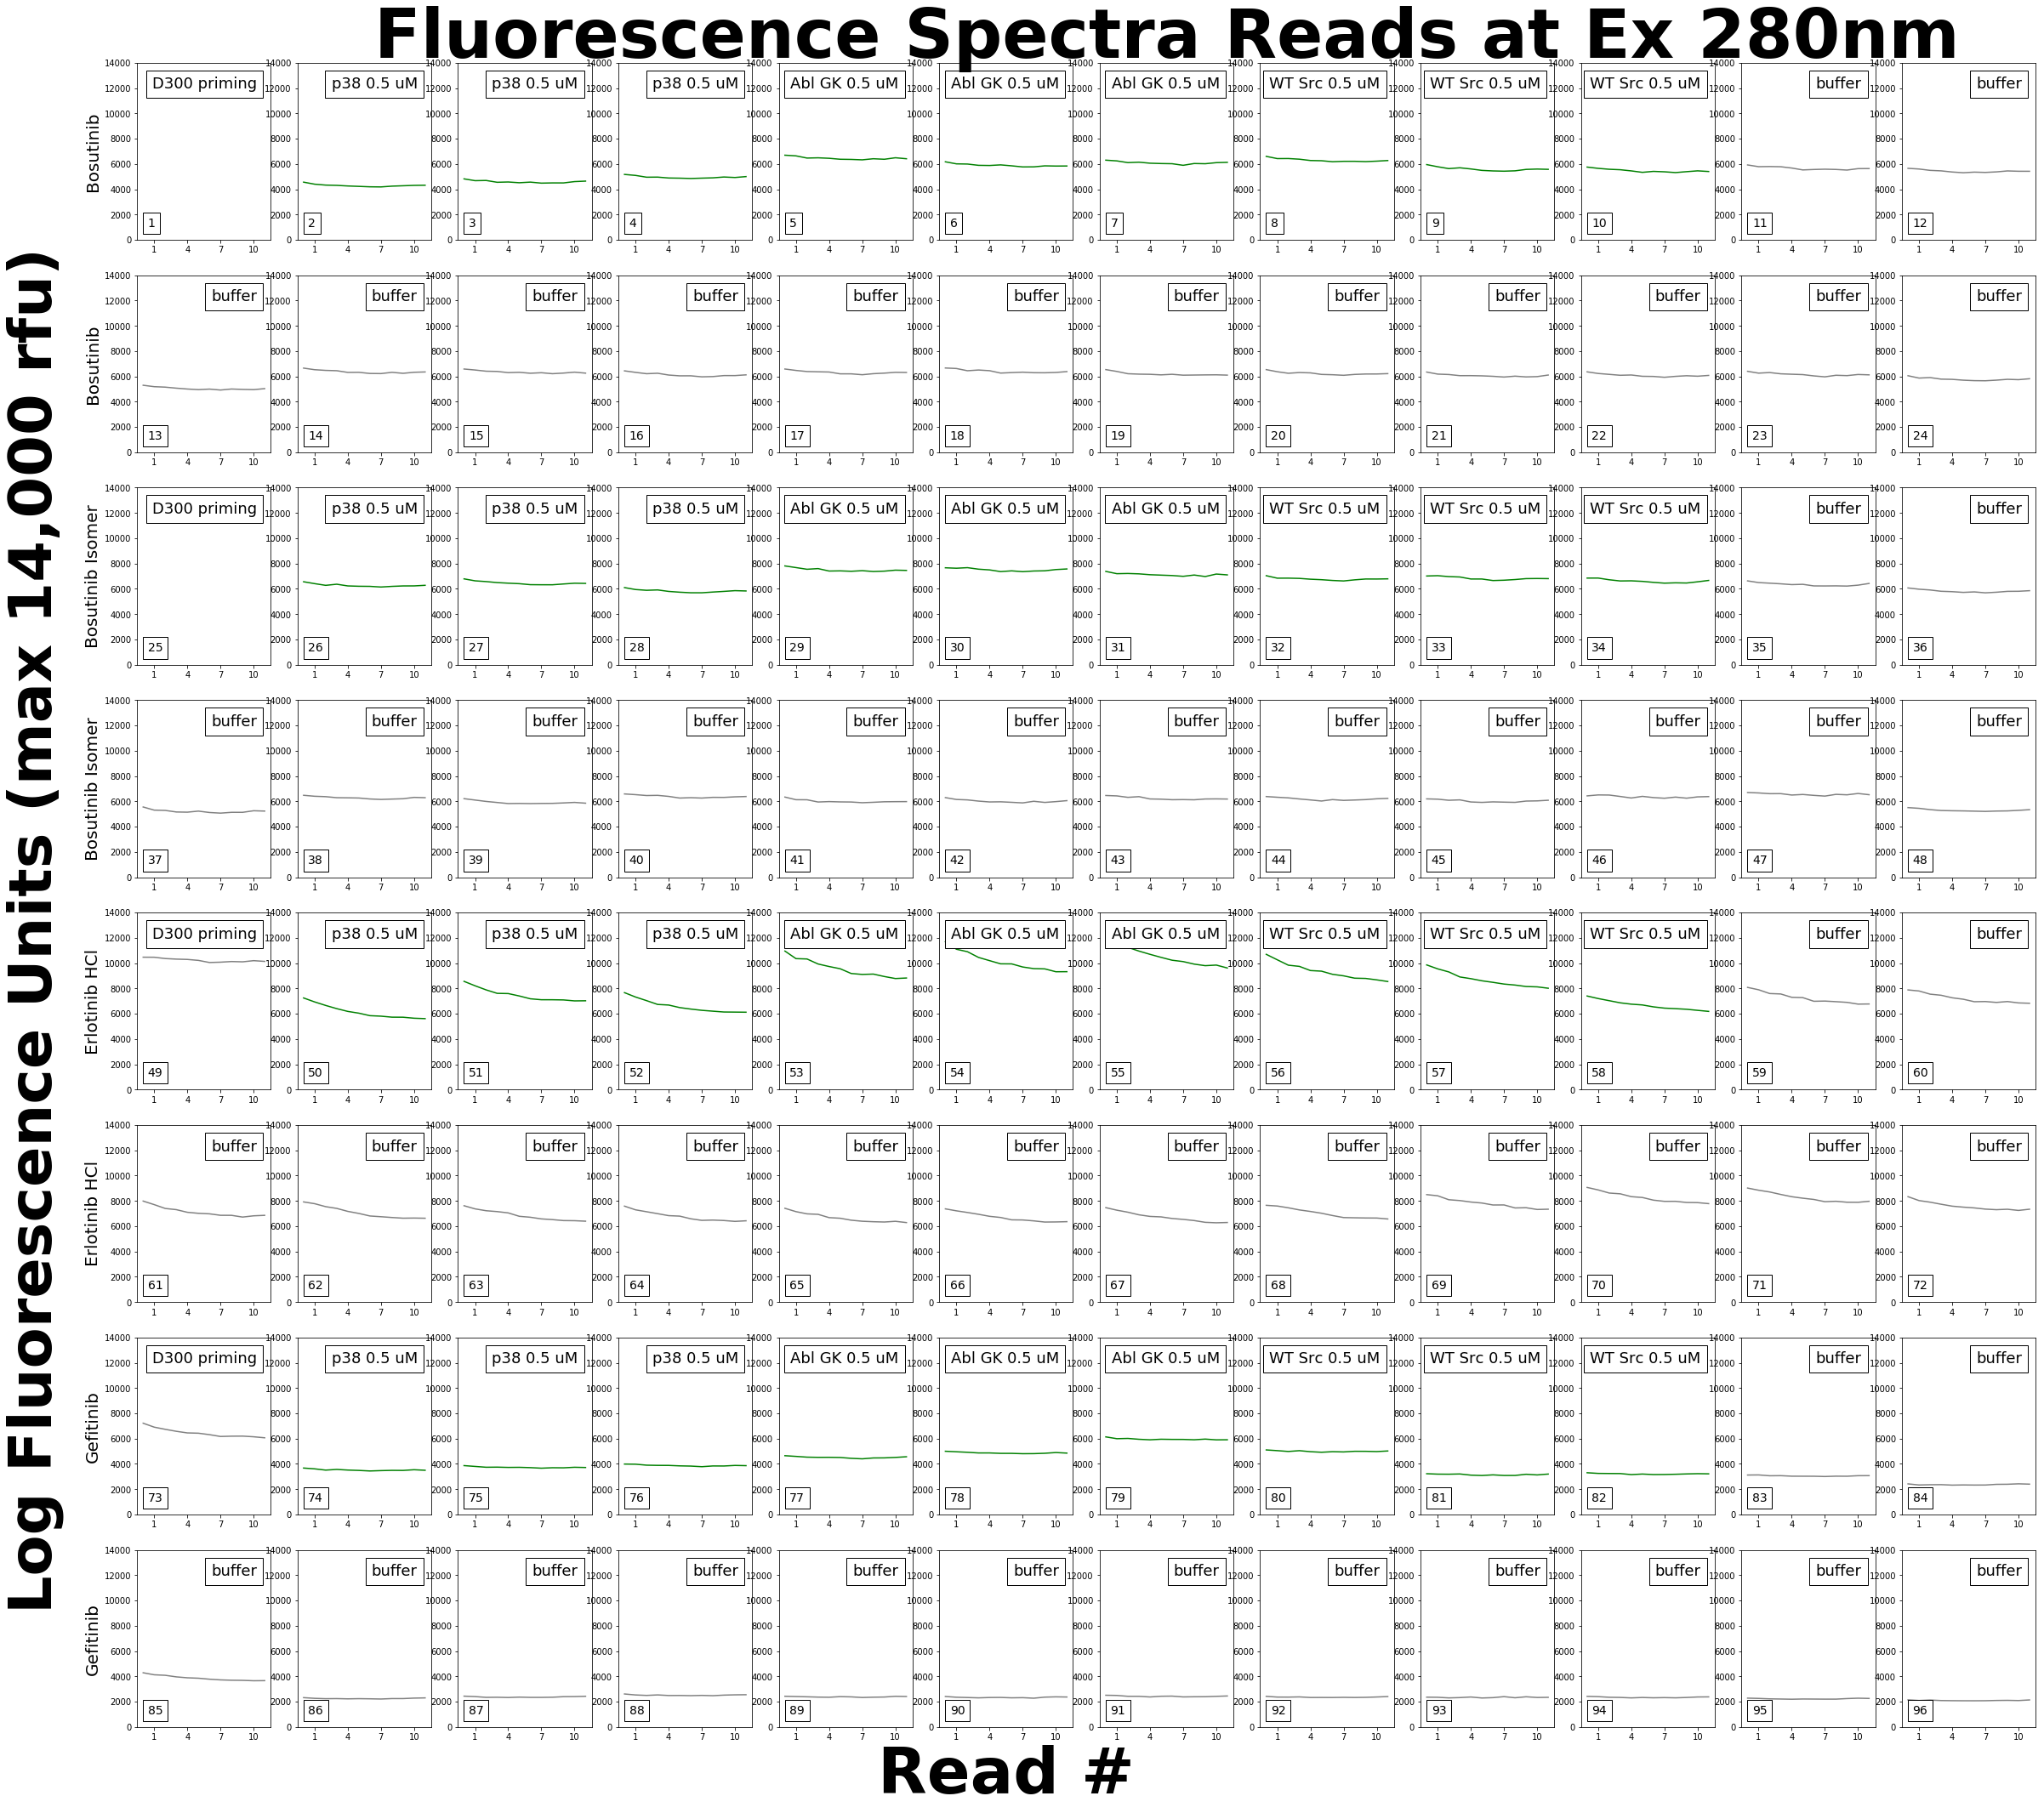

In [18]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'ex280_scan_top_gain100'
title = 'Fluorescence Spectra Reads at Ex 280nm'


# ymax = data.max().max().max()
xmax = max(list(reads_spectra[0][label][well].keys()))
xmin = min(list(reads_spectra[0][label][well].keys()))
# c = list(concentrations)
x = 12

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        fluo_values = [list(reads_spectra[i][label][well].values())[1] for i in range(nreads_spectra)]
        fluo_values = [float(i) for i in fluo_values]
        x_values=range(x)
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color= 'g'
            plt.plot(x_values, fluo_values, color = color)

            plt.ylim(0, 14000)
            plt.xticks(np.arange(1, 12, step=3))
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Read #', fontsize=75, fontweight='bold')
            if index == 6:
                plt.title(title, loc='center', fontsize=80, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Log Fluorescence Units (max 14,000 rfu)', fontsize=70, fontweight='bold')
                axis.yaxis.set_label_coords(-1.75,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)


fig.savefig('20190222_single_well_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

### Make overlap plot of single wv vs spectra traces

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

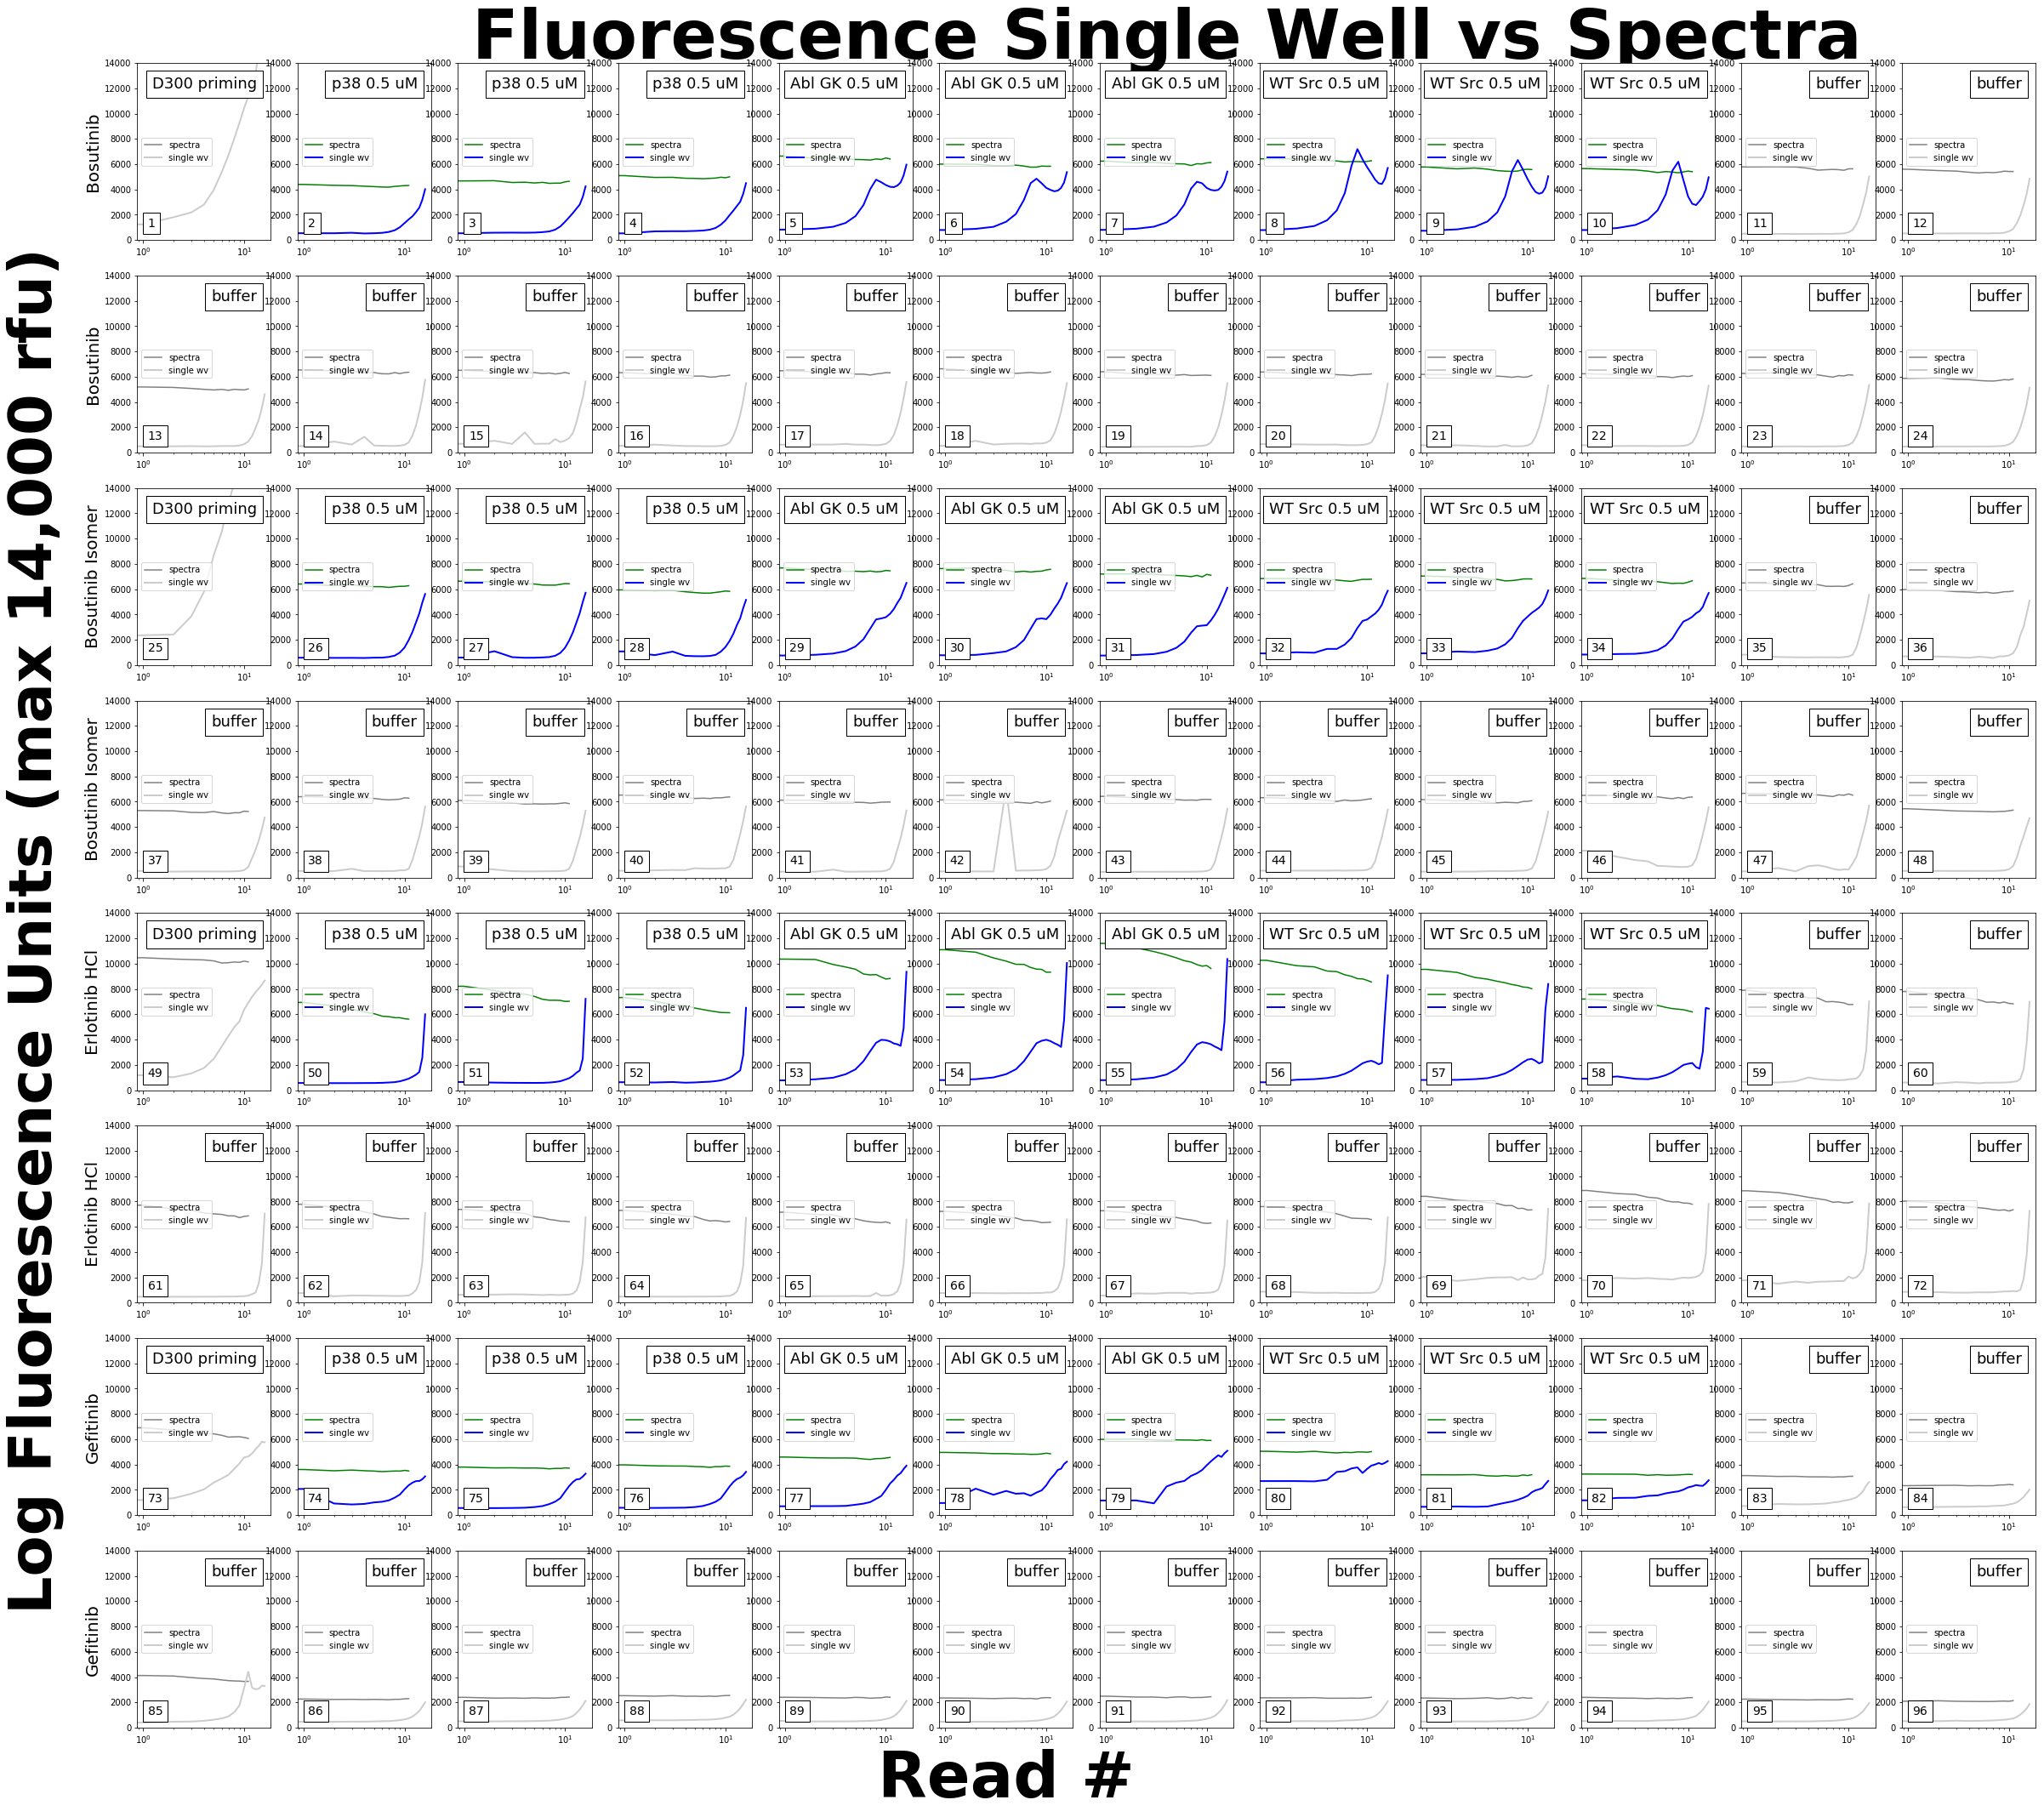

In [20]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'ex280_scan_top_gain100'
title = 'Fluorescence Single Well vs Spectra'


# ymax = data.max().max().max()
xmax = max(list(reads_spectra[0][label][well].keys()))
xmin = min(list(reads_spectra[0][label][well].keys()))
x = 12

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = range(x)
        fluo_values = [list(reads_spectra[i][label][well].values())[1] for i in range(nreads_spectra)]
        fluo_values = [float(i) for i in fluo_values]
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color= 'g'
            plt.semilogx(x_values, fluo_values, color = color, label='spectra')
            plt.legend(loc='center left')
            
            plt.ylim(0, 14000)
    
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Read #', fontsize=75, fontweight='bold')
            if index == 6:
                plt.title(title, loc='center', fontsize=80, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Log Fluorescence Units (max 14,000 rfu)', fontsize=70, fontweight='bold')
                axis.yaxis.set_label_coords(-1.75,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            
index = 0
new_x = 17
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        new_x_values = range(new_x)
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.8'
            else:
                color='b'
            plt.semilogx(new_x_values, data_single_wv[row_index,col_index,:], c=color, linewidth=2, label='single wv');    
            plt.legend(loc='center left')
        
        index += 1

fig.savefig('20190222_rfu_comparison_single_wv_vs_spectra_dialyzed_logx_%s.pdf', dpi=300)